In [51]:
import numpy as np
import pandas as pd
import scipy.linalg 
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
#source: https://stackoverflow.com/questions/28441509/how-to-implement-lu-decomposition-with-partial-pivoting-in-python

In [53]:
def naive_lu_factor(A):
    """
        No pivoting.

        Overwrite A with:
            U (upper triangular) and (unit Lower triangular) L 
        Returns LU (Even though A is also overwritten)
    """
    n = A.shape[0]
    for k in range(n-1):                
        for i in range(k+1,n):          
            A[i,k] = A[i,k]/A[k,k]      # " L[i,k] = A[i,k]/A[k,k] "
            for j in range(k+1,n):      
                A[i,j] -= A[i,k]*A[k,j] # " U[i,j] -= L[i,k]*A[k,j] "

    return A # (if you want)

In [54]:
def lu_factor(A):
    """
        LU factorization with partial pivorting

        Overwrite A with: 
            U (upper triangular) and (unit Lower triangular) L 
        Return [LU,piv] 
            Where piv is 1d numpy array with row swap indices 
    """
    n = A.shape[0]
    piv = np.arange(0,n)
    for k in range(n-1):

        # piv
        max_row_index = np.argmax(abs(A[k:n,k])) + k
        piv[[k,max_row_index]] = piv[[max_row_index,k]]
        A[[k,max_row_index]] = A[[max_row_index,k]]

        # LU 
        for i in range(k+1,n):          
            A[i,k] = A[i,k]/A[k,k]      
            for j in range(k+1,n):      
                A[i,j] -= A[i,k]*A[k,j] 

    return [A,piv]

In [55]:
def ufsub(L,b):
    """ Unit row oriented forward substitution """
    for i in range(L.shape[0]): 
        for j in range(i):
            b[i] -= L[i,j]*b[j]
    return b

In [56]:
def bsub(U,y):
    """ Row oriented backward substitution """
    for i in range(U.shape[0]-1,-1,-1): 
        for j in range(i+1, U.shape[1]):
            y[i] -= U[i,j]*y[j]
        y[i] = y[i]/U[i,i]
    return y

## Example

In [57]:
A = np.array([[60, 91, 26], [60, 3, 75], [45, 90, 31]], dtype='float')
b = np.array([1, 0, 0])
A

array([[60., 91., 26.],
       [60.,  3., 75.],
       [45., 90., 31.]])

In [58]:
# No partial pivoting
LU = naive_lu_factor(A)
print(LU)
y = ufsub( LU, b )
x = bsub(  LU, y )
LU.round(2)

[[ 60.          91.          26.        ]
 [  1.         -88.          49.        ]
 [  0.75        -0.24715909  23.61079545]]


array([[ 60.  ,  91.  ,  26.  ],
       [  1.  , -88.  ,  49.  ],
       [  0.75,  -0.25,  23.61]])

In [59]:
y

array([0, 0, 0])

In [60]:
x

array([0, 0, 0])

In [61]:
# Partial pivoting
LU, piv = lu_factor(A)                      
b = b[piv]
y = ufsub( LU, b )
x = bsub(  LU, y )
LU

array([[ 6.00000000e+01,  9.10000000e+01,  2.60000000e+01],
       [ 1.66666667e-02, -8.95166667e+01,  4.85666667e+01],
       [ 1.25000000e-02,  1.54681708e-02,  2.25345580e+01]])

## Simple example

In [62]:
#https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html
def lu(A):
    
    #Get the number of rows
    n = A.shape[0]
    
    U = A.copy()
    L = np.eye(n, dtype=np.double)
    
    #Loop over rows
    for i in range(n):
            
        #Eliminate entries below i with row operations 
        #on U and reverse the row operations to 
        #manipulate L
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]
        
    return L, U

In [63]:
A = np.array([[60, 91, 26], [60, 3, 75], [45, 90, 31]], dtype='float')
A

array([[60., 91., 26.],
       [60.,  3., 75.],
       [45., 90., 31.]])

In [64]:
L, U =lu(A)

In [65]:
L

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 0.75      , -0.24715909,  1.        ]])

In [66]:
U

array([[ 60.        ,  91.        ,  26.        ],
       [  0.        , -88.        ,  49.        ],
       [  0.        ,   0.        ,  23.61079545]])

In [67]:
scipy.linalg.lu(A)

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[ 1.        ,  0.        ,  0.        ],
        [ 1.        ,  1.        ,  0.        ],
        [ 0.75      , -0.24715909,  1.        ]]),
 array([[ 60.        ,  91.        ,  26.        ],
        [  0.        , -88.        ,  49.        ],
        [  0.        ,   0.        ,  23.61079545]]))

In [68]:
np.allclose(A, L@U)

True

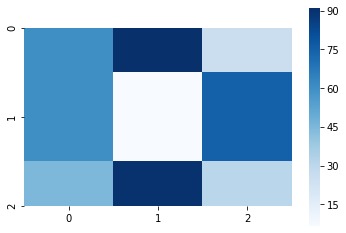

In [69]:
#fig, ax =plt.subplots(figsize=(2.5,2))
sns.heatmap(A, robust=True, cmap='Blues', square=True)

In [70]:
A

array([[60., 91., 26.],
       [60.,  3., 75.],
       [45., 90., 31.]])

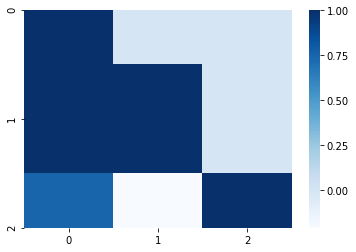

In [71]:
sns.heatmap(L, robust=True, cmap='Blues')

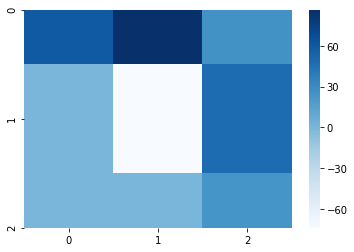

In [72]:
sns.heatmap(U, robust=True, cmap='Blues')

In [73]:
A = np.array([[0, 91, 26], [60, 3, 75], [45, 90, 31]], dtype='float')
L, U =lu(A)

C:\Users\risto\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\risto\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply
C:\Users\risto\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [74]:
L

array([[ 1.,  0.,  0.],
       [inf,  1.,  0.],
       [inf, nan,  1.]])

In [75]:
U

array([[  0.,  91.,  26.],
       [ nan, -inf, -inf],
       [ nan,  nan,  nan]])

## PLU

In [76]:
def plu(A):
    
    #Get the number of rows
    n = A.shape[0]
    
    #Allocate space for P, L, and U
    U = A.copy()
    L = np.eye(n, dtype=np.double)
    P = np.eye(n, dtype=np.double)
    
    #Loop over rows
    for i in range(n):
        
        #Permute rows if needed
        for k in range(i, n): 
            if ~np.isclose(U[i, i], 0.0):
                break
            U[[k, k+1]] = U[[k+1, k]]
            P[[k, k+1]] = P[[k+1, k]]
            
        #Eliminate entries below i with row 
        #operations on U and #reverse the row 
        #operations to manipulate L
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]
        
    return P, L, U

In [77]:
A = np.array([[0, 91, 26], [60, 3, 75], [45, 90, 31]], dtype='float')
A

array([[ 0., 91., 26.],
       [60.,  3., 75.],
       [45., 90., 31.]])

In [78]:
A[[1,0]]

array([[60.,  3., 75.],
       [ 0., 91., 26.]])

In [79]:
P, L, U =plu(A)

In [80]:
P

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [81]:
L

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.75      , 0.96428571, 1.        ]])

In [82]:
U

array([[ 60.        ,   3.        ,  75.        ],
       [  0.        ,  91.        ,  26.        ],
       [  0.        ,   0.        , -50.32142857]])

In [83]:
scipy.linalg.lu(A)

(array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]]),
 array([[1.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.75      , 0.96428571, 1.        ]]),
 array([[ 60.        ,   3.        ,  75.        ],
        [  0.        ,  91.        ,  26.        ],
        [  0.        ,   0.        , -50.32142857]]))

In [84]:
mat=np.array([[1,2,-3,1],
             [2,4,0,7],
             [-1,3,2,0]])
mat

array([[ 1,  2, -3,  1],
       [ 2,  4,  0,  7],
       [-1,  3,  2,  0]])

In [85]:
scipy.linalg.lu(mat)

(array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]]),
 array([[ 1. ,  0. ,  0. ],
        [-0.5,  1. ,  0. ],
        [ 0.5,  0. ,  1. ]]),
 array([[ 2. ,  4. ,  0. ,  7. ],
        [ 0. ,  5. ,  2. ,  3.5],
        [ 0. ,  0. , -3. , -2.5]]))

## Foward substitution

In [86]:
A = np.array([[1, 4, 5], [6, 8, 22], [32, 5., 5]])
b = np.array([1, 2, 3.])
b

array([1., 2., 3.])

In [87]:
L, U = lu(A)

In [88]:
L

array([[ 1.    ,  0.    ,  0.    ],
       [ 6.    ,  1.    ,  0.    ],
       [32.    ,  7.6875,  1.    ]])

In [89]:
def forward_substitution(L, b):
    
    #Get number of rows
    n = L.shape[0]
    
    #Allocating space for the solution vector
    y = np.zeros_like(b, dtype=np.double);
    
    #Here we perform the forward-substitution.  
    #Initializing  with the first row.
    y[0] = b[0] / L[0, 0]
    
    #Looping over rows in reverse (from the bottom  up),
    #starting with the second to last row, because  the 
    #last row solve was completed in the last step.
    for i in range(1, n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]
        
    return y

In [90]:
y=forward_substitution(L, b)
y

array([ 1.  , -4.  ,  1.75])

## Backward substitution

In [91]:
def back_substitution(U, y):
    
    #Number of rows
    n = U.shape[0]
    
    #Allocating space for the solution vector
    x = np.zeros_like(y, dtype=np.double);

    #Here we perform the back-substitution.  
    #Initializing with the last row.
    x[-1] = y[-1] / U[-1, -1]
    
    #Looping over rows in reverse (from the bottom up), 
    #starting with the second to last row, because the 
    #last row solve was completed in the last step.
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i:], x[i:])) / U[i,i]
        
    return x

In [92]:
back_substitution(U, y)

array([ 0.05614973,  0.25935829, -0.01871658])

In [93]:
U

array([[  1. ,   4. ,   5. ],
       [  0. , -16. ,  -8. ],
       [  0. ,   0. , -93.5]])

In [94]:
def lu_solve(A, b):
    L, U = lu(A)
    y = forward_substitution(L, b)
    return back_substitution(U, y)

In [95]:
lu_solve(A, b)

array([ 0.05614973,  0.25935829, -0.01871658])

In [96]:
np.linalg.solve(A, b)

array([ 0.05614973,  0.25935829, -0.01871658])

In [133]:
A = np.array([[1, 5, 5], [6, 9, 22], [32, 5., 5]])
b = np.array([1, 2, 7])

In [137]:
def plu_solve(A, b):
    P, L, U = plu(A)
    y = forward_substitution(L, P@ b)
    return back_substitution(U, y)

In [138]:
plu_solve(A, b)

array([ 0.19354839,  0.20843672, -0.0471464 ])

In [136]:
scipy.linalg.solve(A, b)

array([ 0.19354839,  0.20843672, -0.0471464 ])

In [139]:
np.allclose(plu_solve(A, b), scipy.linalg.solve(A, b))

True

## Doolittle

In [99]:
def doolittle(A):
    
    n = A.shape[0]
    
    U = np.zeros((n, n), dtype=np.double)
    L = np.eye(n, dtype=np.double)
    
    for k in range(n):
        print(f'iteration nr {k}')
        print(f'U {U}')
        print(f'L {L}')
        print()
        U[k, k:] = A[k, k:] - L[k,:k] @ U[:k,k:]
        print(f'A[k, k:] {A[k, k:]}')
        print(f'L[k,:k] {L[k,:k]}')
        print(f'U[:k,k:] {U[:k,k:]}')
        print(f'L[k,:k] @ U[:k,k:] {L[k,:k] @ U[:k,k:]}')
        
        print()
        print(f'A[(k+1):,k]  {A[(k+1):,k] }')
        print(f'L[(k+1):,:] {L[(k+1):,:] }')
        print(f'U[:,k] {U[:,k]}')
        print(f'U[k, k] {U[k, k]}')
        L[(k+1):,k] = (A[(k+1):,k] - L[(k+1):,:] @ U[:,k]) / U[k, k]
    
    return L, U

In [146]:
A = np.array([[1, 4, 5, 4], [6, 8, 22, 9], [32, 5., 5, 5]])
P, L, U = scipy.linalg.lu(A)

In [147]:
P

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [148]:
L

array([[1.        , 0.        , 0.        ],
       [0.1875    , 1.        , 0.        ],
       [0.03125   , 0.54424779, 1.        ]])

In [149]:
U

array([[32.        ,  5.        ,  5.        ,  5.        ],
       [ 0.        ,  7.0625    , 21.0625    ,  8.0625    ],
       [ 0.        ,  0.        , -6.61946903, -0.54424779]])

In [100]:
A

array([[ 1.,  4.,  5.],
       [ 6.,  8., 22.],
       [32.,  5.,  5.]])

In [101]:
A = np.array([[1, 4, 5], [6, 8, 22], [32, 5., 5]])
L, U = doolittle(A)

iteration nr 0
U [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
L [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

A[k, k:] [1. 4. 5.]
L[k,:k] []
U[:k,k:] []
L[k,:k] @ U[:k,k:] [0. 0. 0.]

A[(k+1):,k]  [ 6. 32.]
L[(k+1):,:] [[0. 1. 0.]
 [0. 0. 1.]]
U[:,k] [1. 0. 0.]
U[k, k] 1.0
iteration nr 1
U [[1. 4. 5.]
 [0. 0. 0.]
 [0. 0. 0.]]
L [[ 1.  0.  0.]
 [ 6.  1.  0.]
 [32.  0.  1.]]

A[k, k:] [ 8. 22.]
L[k,:k] [6.]
U[:k,k:] [[4. 5.]]
L[k,:k] @ U[:k,k:] [24. 30.]

A[(k+1):,k]  [5.]
L[(k+1):,:] [[32.  0.  1.]]
U[:,k] [  4. -16.   0.]
U[k, k] -16.0
iteration nr 2
U [[  1.   4.   5.]
 [  0. -16.  -8.]
 [  0.   0.   0.]]
L [[ 1.      0.      0.    ]
 [ 6.      1.      0.    ]
 [32.      7.6875  1.    ]]

A[k, k:] [5.]
L[k,:k] [32.      7.6875]
U[:k,k:] [[ 5.]
 [-8.]]
L[k,:k] @ U[:k,k:] [98.5]

A[(k+1):,k]  []
L[(k+1):,:] []
U[:,k] [  5.   -8.  -93.5]
U[k, k] -93.5


In [102]:
A

array([[ 1.,  4.,  5.],
       [ 6.,  8., 22.],
       [32.,  5.,  5.]])

In [103]:
L

array([[ 1.    ,  0.    ,  0.    ],
       [ 6.    ,  1.    ,  0.    ],
       [32.    ,  7.6875,  1.    ]])

In [104]:
U

array([[  1. ,   4. ,   5. ],
       [  0. , -16. ,  -8. ],
       [  0. ,   0. , -93.5]])

In [105]:
n = A.shape[0]

U = np.zeros((n, n), dtype=np.double)
L = np.eye(n, dtype=np.double)

# for k in range(n):

#     U[k, k:] = A[k, k:] - L[k,:k] @ U[:k,k:]
#     L[(k+1):,k] = (A[(k+1):,k] - L[(k+1):,:] @ U[:,k]) / U[k, k]

In [106]:
k=0
A[k, k:]

array([1., 4., 5.])

In [107]:
L[k,:k]

array([], dtype=float64)

In [108]:
U[:k,k:]

array([], shape=(0, 3), dtype=float64)

In [109]:
U[k, k:] = A[k, k:] - L[k,:k] @ U[:k,k:]

In [110]:
L

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [111]:
L[(k+1):,:]

array([[0., 1., 0.],
       [0., 0., 1.]])

In [112]:
#https://www.geeksforgeeks.org/doolittle-algorithm-lu-decomposition/
MAX = 100
 
 
def luDecomposition(mat, n):
 
    lower = [[0 for x in range(n)]
             for y in range(n)]
    upper = [[0 for x in range(n)]
             for y in range(n)]
 
    # Decomposing matrix into Upper
    # and Lower triangular matrix
    for i in range(n):
 
        # Upper Triangular
        for k in range(i, n):
 
            # Summation of L(i, j) * U(j, k)
            sum = 0
            for j in range(i):
                sum += (lower[i][j] * upper[j][k])
 
            # Evaluating U(i, k)
            upper[i][k] = mat[i][k] - sum
 
        # Lower Triangular
        for k in range(i, n):
            if (i == k):
                lower[i][i] = 1  # Diagonal as 1
            else:
 
                # Summation of L(k, j) * U(j, i)
                sum = 0
                for j in range(i):
                    sum += (lower[k][j] * upper[j][i])
 
                # Evaluating L(k, i)
                lower[k][i] = int((mat[k][i] - sum) /
                                  upper[i][i])
 
    # setw is for displaying nicely
    print("Lower Triangular\t\tUpper Triangular")
 
    # Displaying the result :
    for i in range(n):
 
        # Lower
        for j in range(n):
            print(lower[i][j], end="\t")
        print("", end="\t")
 
        # Upper
        for j in range(n):
            print(upper[i][j], end="\t")
        print("")
 
 
# Driver code
A = np.array([[1, 4, 5], [6, 8, 22], [32, 5., 5]])
 
luDecomposition(A, 3)

Lower Triangular		Upper Triangular
1	0	0		1.0	4.0	5.0	
6	1	0		0	-16.0	-8.0	
32	7	1		0	0	-99.0	


## Crout

In [113]:
def crout(A):
    
    n = A.shape[0]
    
    U = np.zeros((n, n), dtype=np.double)
    L = np.zeros((n, n), dtype=np.double)
    
    for k in range(n):
        
        L[k, k] = A[k, k] - L[k, :] @ U[:, k]
        
        U[k, k:] = (A[k, k:] - L[k, :k] @ U[:k, k:]) / L[k, k]
        L[(k+1):, k] = (A[(k+1):, k] - L[(k+1):, :] @ U[:, k]) / U[k, k]
    
    return L, U

In [114]:
L, U = crout(A)

In [115]:
L

array([[   1. ,    0. ,    0. ],
       [   6. ,  -16. ,    0. ],
       [  32. , -123. ,  -93.5]])

In [116]:
U

array([[1. , 4. , 5. ],
       [0. , 1. , 0.5],
       [0. , 0. , 1. ]])

## Cholesky

In [117]:
def cholesky(A):
    
    n = A.shape[0]
    
    L = np.zeros((n, n), dtype=np.double)
    
    for k in range(n):
        
        L[k, k] = np.sqrt(A[k, k] - np.sum(L[k, :] ** 2))
        
        L[(k+1):, k] = (A[(k+1):, k] - L[(k+1):, :] @ L[:, k]) / L[k, k]
    
    return L

In [118]:
A = np.array([[2, -1, 0],[-1, 2, -1.], [0, -1, 2.]])
L = cholesky(A)

In [119]:
L

array([[ 1.41421356,  0.        ,  0.        ],
       [-0.70710678,  1.22474487,  0.        ],
       [ 0.        , -0.81649658,  1.15470054]])

In [120]:
L@L.T #is A

array([[ 2., -1.,  0.],
       [-1.,  2., -1.],
       [ 0., -1.,  2.]])

In [121]:
L = np.linalg.cholesky(A)
L

array([[ 1.41421356,  0.        ,  0.        ],
       [-0.70710678,  1.22474487,  0.        ],
       [ 0.        , -0.81649658,  1.15470054]])

## Inverse

In [140]:
def plu_inverse(A):
    
    n = A.shape[0]
    
    b = np.eye(n)
    Ainv = np.zeros((n, n))
    
    P, L, U = plu(A)
    
    for i in range(n):
#         print(f'b {np.dot(P, b[i, :])}')
#         print(f'L {L}')
        y = forward_substitution(L, np.dot(P, b[i, :]))
#         print(f'y {y}')
        Ainv[i, :] = back_substitution(U, y)
#         print(Ainv)
        
    return Ainv

In [141]:
A = np.array([[2, -1, 0],[-1, 2, -1.], [0, -1, 2.]])

In [142]:
plu_inverse(A)

array([[0.75, 0.5 , 0.25],
       [0.5 , 1.  , 0.5 ],
       [0.25, 0.5 , 0.75]])

In [125]:
np.linalg.inv(A)

array([[0.75, 0.5 , 0.25],
       [0.5 , 1.  , 0.5 ],
       [0.25, 0.5 , 0.75]])

In [143]:
np.allclose(plu_inverse(A), np.linalg.inv(A))

True

## Determinant

In [126]:
def plu_for_det(A):
    
    #Get the number of rows
    n = A.shape[0]
    
    U = A.copy()
    L = np.eye(n, dtype=np.double)
    P = np.eye(n, dtype=np.double)
    
    number_of_permutations = 0
    
    #Loop over rows
    for i in range(n):
        
        for k in range(i, n): 
            if ~np.isclose(U[i, i], 0.0):
                break
            U[[k, k+1]] = U[[k+1, k]]
            P[[k, k+1]] = P[[k+1, k]]
            number_of_permutations += 1
            
        #Eliminate entries below i with row operations on U and
        #reverse the row operations to manipulate L
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]
        
    return U, number_of_permutations

In [127]:
def plu_det(A):
    
    U, number_of_permutations = plu_for_det(A)
    
    if number_of_permutations % 2 == 0:
        return np.diagonal(U).prod()
    else:
        return -np.diagonal(U).prod()

In [128]:
plu_det(A)

4.0

In [129]:
np.linalg.det(A)

4.0